In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import chardet
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset\supermarket_sales.csv


In [3]:
with open('./dataset/supermarket_sales.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [35]:
df = pd.read_csv('./dataset/supermarket_sales.csv')
df.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender_customer',
       'product_line', 'unit_cost', 'quantity', '5pct_markup', 'revenue',
       'date', 'time', 'payment_method', 'cogs', 'gm_pct', 'gross_income',
       'rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

In [7]:
df.isnull().sum()

invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_cost,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
5pct_markup,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
revenue,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gm_pct,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
invoice_id,1000,1000,750-67-8428,1
branch,1000,3,A,340
city,1000,3,Yangon,340
customer_type,1000,2,Member,501
gender_customer,1000,2,Female,501
product_line,1000,6,Fashion accessories,178
date,1000,89,02/07/19,20
time,1000,506,19:48,7
payment_method,1000,3,Ewallet,345


PERBAIKAN KOLOM WAKTU

In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
# date + time
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'], errors='coerce')
df['datetime'].head()

0   2019-01-05 13:08:00
1   2019-03-08 10:29:00
2   2019-03-03 13:23:00
3   2019-01-27 20:33:00
4   2019-02-08 10:37:00
Name: datetime, dtype: datetime64[ns]

In [13]:
# ekstrak elemen
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [14]:
df.dtypes[['date', 'time', 'year', 'month', 'day', 'weekday', 'hour']]

date       datetime64[ns]
time               object
year                int32
month               int32
day                 int32
weekday            object
hour                int32
dtype: object

KONVERSI KATEGORI TIPE
>Memudahkan proses EDA

In [15]:
for cols in df.select_dtypes(include=['object']):
    df[cols] = df[cols].astype('category') if df[cols].nunique() < 10 else df[cols]

In [16]:
for cols in df.select_dtypes(include=['category']):
    print(f"{cols}: {df[cols].unique()}")

branch: ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
city: ['Yangon', 'Naypyitaw', 'Mandalay']
Categories (3, object): ['Mandalay', 'Naypyitaw', 'Yangon']
customer_type: ['Member', 'Normal']
Categories (2, object): ['Member', 'Normal']
gender_customer: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
product_line: ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
Categories (6, object): ['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']
payment_method: ['Ewallet', 'Cash', 'Credit card']
Categories (3, object): ['Cash', 'Credit card', 'Ewallet']
weekday: ['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday', 'Tuesday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_id       1000 non-null   object        
 1   branch           1000 non-null   category      
 2   city             1000 non-null   category      
 3   customer_type    1000 non-null   category      
 4   gender_customer  1000 non-null   category      
 5   product_line     1000 non-null   category      
 6   unit_cost        1000 non-null   float64       
 7   quantity         1000 non-null   int64         
 8   5pct_markup      1000 non-null   float64       
 9   revenue          1000 non-null   float64       
 10  date             1000 non-null   datetime64[ns]
 11  time             1000 non-null   object        
 12  payment_method   1000 non-null   category      
 13  cogs             1000 non-null   float64       
 14  gm_pct           1000 non-null   float64 

CEK WITH Z-SCORE

In [18]:
# Kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Menghitung jumlah outlier per kolom berdasarkan Z-score
outlier_report = {}

for col in numeric_cols:
    z = (df[col] - df[col].mean()) / df[col].std()
    outlier_report[col] = (np.abs(z) > 3).sum()

outlier_report


{'unit_cost': 0,
 'quantity': 0,
 '5pct_markup': 0,
 'revenue': 0,
 'cogs': 0,
 'gm_pct': 0,
 'gross_income': 0,
 'rating': 0}

CEK WITH IQR METHOD

In [24]:
outlier_report_iqr = {}

df_clean_agresif = df.copy()

for cols in numeric_cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # menghitung batas
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # cek outlier
    outliers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)]
    
    outlier_report_iqr[cols] = len(outliers)
    
    print(f"Kolom: {cols}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[cols]].head())
    print("-" * 50)
    
    # hapus outlier
    df_clean_agresif = df_clean_agresif[(df_clean_agresif[cols] >= lower_bound) & (df_clean_agresif[cols] <= upper_bound)]

Kolom: unit_cost
Jumlah outlier: 0
Empty DataFrame
Columns: [unit_cost]
Index: []
--------------------------------------------------
Kolom: quantity
Jumlah outlier: 0
Empty DataFrame
Columns: [quantity]
Index: []
--------------------------------------------------
Kolom: 5pct_markup
Jumlah outlier: 9
     5pct_markup
166       47.790
167       49.490
350       49.650
357       47.720
422       48.605
--------------------------------------------------
Kolom: revenue
Jumlah outlier: 9
      revenue
166  1003.590
167  1039.290
350  1042.650
357  1002.120
422  1020.705
--------------------------------------------------
Kolom: cogs
Jumlah outlier: 9
      cogs
166  955.8
167  989.8
350  993.0
357  954.4
422  972.1
--------------------------------------------------
Kolom: gm_pct
Jumlah outlier: 0
Empty DataFrame
Columns: [gm_pct]
Index: []
--------------------------------------------------
Kolom: gross_income
Jumlah outlier: 9
     gross_income
166        47.790
167        49.490
350        4

In [33]:
df_clean_agresif.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
unit_cost,991.0,55.292482,26.311619,10.080000,32.665000,54.840000,77.485000,99.960000
quantity,991.0,5.469223,2.905031,1.000000,3.000000,5.000000,8.000000,10.000000
5pct_markup,991.0,15.076417,11.319504,0.508500,5.817500,12.036000,22.127000,45.325000
revenue,991.0,316.604752,237.709589,10.678500,122.167500,252.756000,464.667000,951.825000
cogs,991.0,301.528335,226.390085,10.170000,116.350000,240.720000,442.540000,906.500000
gm_pct,991.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,991.0,15.076417,11.319504,0.508500,5.817500,12.036000,22.127000,45.325000
rating,991.0,6.979717,1.716957,4.000000,5.500000,7.000000,8.500000,10.000000


In [26]:
outlier_report_iqr

{'unit_cost': 0,
 'quantity': 0,
 '5pct_markup': 9,
 'revenue': 9,
 'cogs': 9,
 'gm_pct': 0,
 'gross_income': 9,
 'rating': 0}

In [27]:
outliers_index = []

for column in numeric_cols:
    Q1a = df[column].quantile(0.25)
    Q3a = df[column].quantile(0.75)
    IQRa = Q3a - Q1a
    
    lower = Q1a - 1.5*IQRa
    upper = Q3a + 1.5*IQRa
    
    outliers_data = df[(df[column] < lower) | (df[column] > upper)]
    
    for idx in outliers_data.index:
        if idx not in outliers_index:
            outliers_index.append(idx)
    
    print(f"Outlier in {column}: {len(outliers_data)}")

Outlier in unit_cost: 0
Outlier in quantity: 0
Outlier in 5pct_markup: 9
Outlier in revenue: 9
Outlier in cogs: 9
Outlier in gm_pct: 0
Outlier in gross_income: 9
Outlier in rating: 0


In [ ]:
df_clean_aman = df.copy()
num_cols = df_clean_aman[numeric_cols].drop(outliers_index)
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_cost,991.0,55.292482,26.311619,10.080000,32.665000,54.840000,77.485000,99.960000
quantity,991.0,5.469223,2.905031,1.000000,3.000000,5.000000,8.000000,10.000000
5pct_markup,991.0,15.076417,11.319504,0.508500,5.817500,12.036000,22.127000,45.325000
revenue,991.0,316.604752,237.709589,10.678500,122.167500,252.756000,464.667000,951.825000
cogs,991.0,301.528335,226.390085,10.170000,116.350000,240.720000,442.540000,906.500000
gm_pct,991.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,991.0,15.076417,11.319504,0.508500,5.817500,12.036000,22.127000,45.325000
rating,991.0,6.979717,1.716957,4.000000,5.500000,7.000000,8.500000,10.000000


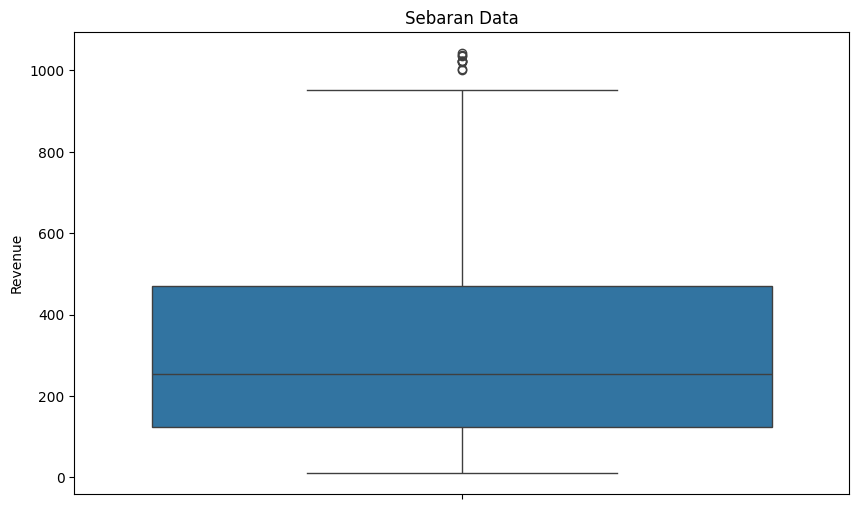

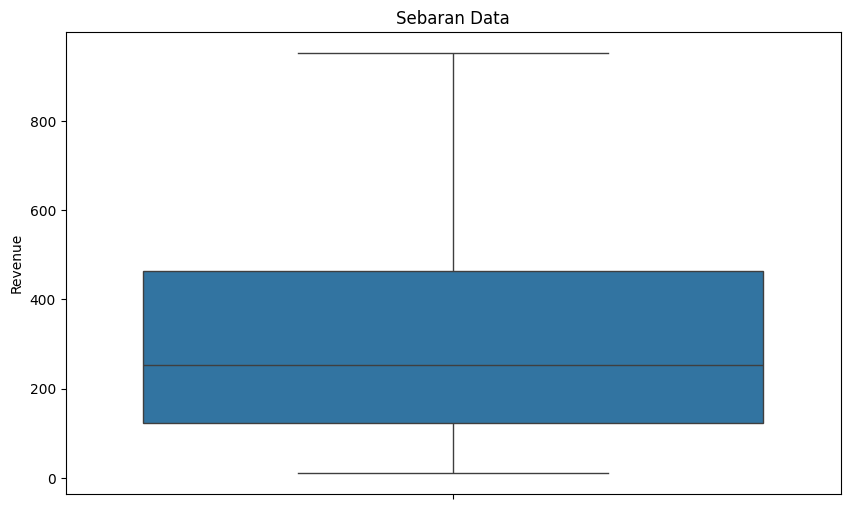

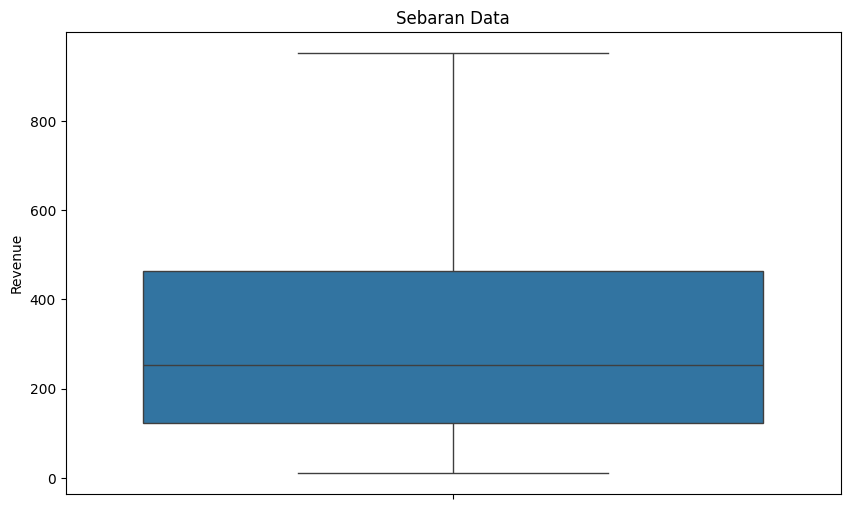

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(df['revenue'])
plt.title('Sebaran Data')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(num_cols['revenue'])
plt.title('Sebaran Data')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df_clean_agresif['revenue'])
plt.title('Sebaran Data')
plt.ylabel('Revenue')
plt.show()